# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








In [ ]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import re
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [ ]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [ ]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [ ]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


In [ ]:
# Print number of missing values in banking
#print(data.isna().sum())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
data.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

In [ ]:
# Shipping cost
#Try changing the variable to numery type
# Checking if there are other values apart from floats
numeric_vals = pd.to_numeric(data['Shipping Cost'],errors = 'coerce')
idx = numeric_vals.isna()
print(data['Shipping Cost'][idx])

Series([], Name: Shipping Cost, dtype: float64)


In [ ]:
# Profit
#Try changing the variable to numery type
# Checking if there are other values apart from floats
numeric_vals_profit = pd.to_numeric(data['Profit'],errors = 'coerce')
idxx = numeric_vals_profit.isna()
print(data['Profit'][idxx])

Series([], Name: Profit, dtype: float64)


In [ ]:
# Quantity
#Try changing the variable to numery type
# Checking if there are other values apart from floats
numeric_vals_quantity = pd.to_numeric(data['Quantity'],errors = 'coerce')
idxxx = numeric_vals_quantity.isna()
print(data['Quantity'][idxxx])

Series([], Name: Quantity, dtype: int64)


In [ ]:
# Sales
#Try changing the variable to numery type
# Checking if there are other values apart from floats
numeric_vals_sales = pd.to_numeric(data['Sales'],errors = 'coerce')
idxxxx = numeric_vals_sales.isna()
print(data['Sales'][idxxxx])

Series([], Name: Sales, dtype: float64)


In [ ]:
# Discount
#Try changing the variable to numery type
# Checking if there are other values apart from floats
numeric_vals_discount = pd.to_numeric(data['Discount'],errors = 'coerce')
idxxxxx = numeric_vals_discount.isna()
print(data['Discount'][idxxxxx])

Series([], Name: Discount, dtype: float64)


In [ ]:
# Checking the Categorical variables

In [ ]:
print(data['Region'].unique())

['Africa' 'Oceania' 'EMEA' 'North' 'Central Asia' 'West' 'North Asia'
 'Central' 'South' 'Canada' 'Southeast Asia' 'East' 'Caribbean']


In [ ]:
print(data['Market'].unique())

['Africa' 'APAC' 'EMEA' 'EU' 'US' 'LATAM' 'Canada']


In [ ]:
print(data['Ship Mode'].unique())

['Standard Class' 'Second Class' 'First Class' 'Same Day']


In [ ]:
print(data['Market'].unique())

['Africa' 'APAC' 'EMEA' 'EU' 'US' 'LATAM' 'Canada']


In [ ]:
print(data['Segment'].unique())

['Consumer' 'Home Office' 'Corporate']


In [ ]:
print(data['Sub-Category'].unique())

['Storage' 'Supplies' 'Paper' 'Furnishings' 'Copiers' 'Bookcases'
 'Appliances' 'Art' 'Accessories' 'Binders' 'Labels' 'Envelopes' 'Chairs'
 'Machines' 'Tables' 'Phones' 'Fasteners']


In [ ]:
print(data['Order Priority'].unique())

['Medium' 'High' 'Critical' 'Low']


In [ ]:
# Changing the Category Variable to a category and also the sub categories to categories
data['Category'] = data['Category'].astype('category') 
data['Region'] = data['Region'].astype('category')
data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Market'] = data['Market'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
data['Order Priority'] = data['Order Priority'].astype('category')
#data['Category'].head()

In [ ]:
# Describing the variables with dtype object
des_object = data.describe(include=[object])
des_object.T

,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Product ID,51290,10292,OFF-AR-10003651,35
Product Name,51290,3788,Staples,227


In [ ]:
des_numeric = data.describe(include=[np.number])
des_numeric.T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


In [ ]:
des_category = data.describe(include=['category'])
des_category.T

,count,unique,top,freq
Ship Mode,51290,4,Standard Class,30775
Segment,51290,3,Consumer,26518
Market,51290,7,APAC,11002
Region,51290,13,Central,11117
Category,51290,3,Office Supplies,31273
Sub-Category,51290,17,Binders,6152
Order Priority,51290,4,Medium,29433


In [ ]:
# Print number of missing values in banking
print(data.isna().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [ ]:
# Creating the unit price column
data['Unit_Price'] = round(data['Sales']/data['Quantity'],3)


In [ ]:
# Creating the year and month column
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [ ]:
# Finding the intervals between the ship date and order date
data['Intervals'] = data['Ship Date'] - data['Order Date']
data['Intervals'] = data['Intervals'].astype('str')
data['Intervals'] = data['Intervals'].str.strip('days').astype('int')

In [ ]:
data['Year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

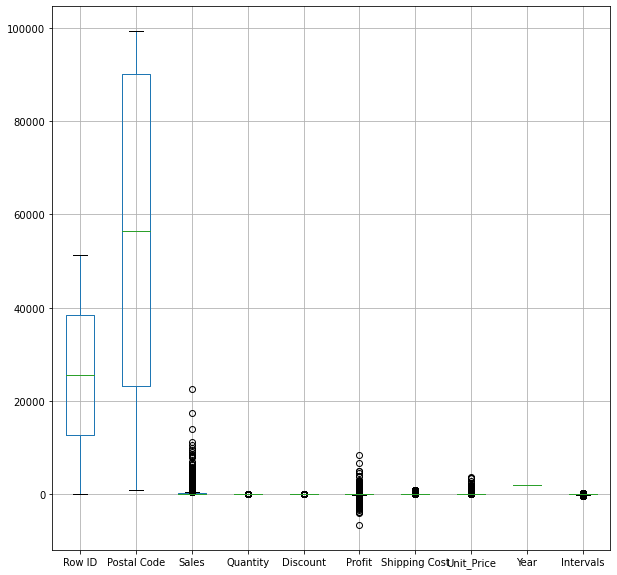

In [ ]:
data.boxplot(figsize=(10,10))
plt.show()

# Analysis

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price,Year,Month,Intervals
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,2011,1,151
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,2011,1,212
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,2011,1,120
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,2011,1,120
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,2011,1,212


## What is the sales and profit per market?

In [ ]:
# What is the sales and profit per market?
# Accross the four year period
total_sales_profit = data.groupby(['Market']).agg(Total_sales = ('Sales','sum'),Total_profit = ('Profit','sum')).reset_index()
total_sales_profit[['Total_sales','Total_profit']] = round(total_sales_profit[['Total_sales','Total_profit']],3)
total_sales_profit = total_sales_profit.sort_values(by ='Total_sales',ascending = False)
total_sales_profit

,Market,Total_sales,Total_profit
0,APAC,3585744.129,436000.049
4,EU,2938089.062,372829.742
6,US,2297200.860,286397.022
5,LATAM,2164605.167,221643.487
3,EMEA,806161.311,43897.971
1,Africa,783773.211,88871.631
2,Canada,66928.170,17817.390


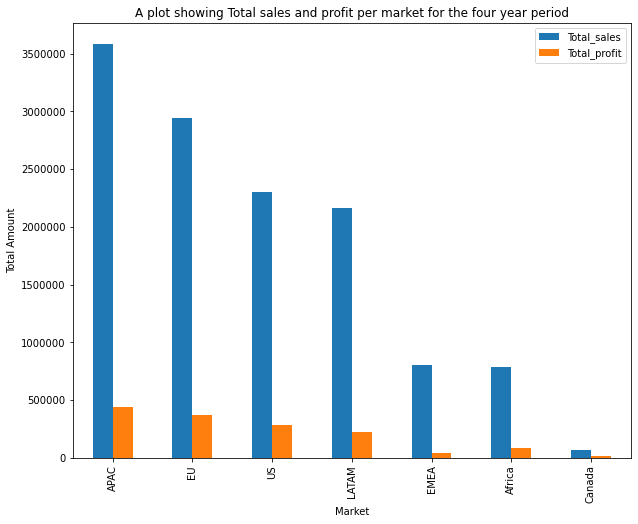

In [ ]:
# Plotting the market against sales avearge and profit average
total_sales_profit.plot(x="Market", y=["Total_sales", "Total_profit"], kind="bar", figsize=(10, 8))
plt.ylabel('Total Amount')
plt.title('A plot showing Total sales and profit per market for the four year period')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

## What is the most and least profitable market?

In [ ]:
# Most profitable Market
most_profitable_market = total_sales_profit[total_sales_profit['Total_profit'] == total_sales_profit['Total_profit'].max() ]
most_profitable_market

,Market,Total_sales,Total_profit
0,APAC,3585744.129,436000.049


In [ ]:
# Least profitable Market
least_profitable_market = total_sales_profit[total_sales_profit['Total_profit'] == total_sales_profit['Total_profit'].min() ]
least_profitable_market

,Market,Total_sales,Total_profit
2,Canada,66928.17,17817.39


## How are you going to increase the sales for the products that least bought?

In [ ]:
sales_least_bought = data.groupby('Product Name')['Profit', 'Sales'].sum().sort_values(by='Sales',ascending=True).reset_index()
sales_least_bought.head(10)

,Product Name,Profit,Sales
0,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,-4.4660,1.624
1,Avery 5,2.8224,5.760
2,Xerox 20,3.1104,6.480
3,Grip Seal Envelopes,2.3868,7.072
4,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,3.1570,7.700
5,"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",3.0420,7.800
6,Xerox 1989,2.6892,7.968
7,4009 Highlighters,2.7336,8.040
8,Stockwell Gold Paper Clips,3.4040,8.096
9,Newell 308,2.1000,8.400


## Which month does the company records more sales?

In [ ]:
month_sales = data.groupby('Month').agg(Total_sales = ('Sales','sum')).reset_index()
month_sales['Total_sales'] = round(month_sales['Total_sales'],3)
month_sales['Month'] = month_sales['Month'].astype(str)
month_sales['Month'] = month_sales['Month'].replace({ '1': "Jan", '2': "Feb", '3': "Mar",'4': "Apr",'5': "May",'6': "Jun",\
                                       '7': "Jul",'8': "Aug",'9': "Sept",'10': "Oct",'11': "Nov",'12': "Dec"})
month_sales

,Month,Total_sales
0,Jan,775766.912
1,Feb,722853.169
2,Mar,951333.085
3,Apr,851617.321
4,May,976415.681
5,Jun,1152367.788
6,Jul,838743.556
7,Aug,1247500.805
8,Sept,1244139.726
9,Oct,1120777.468


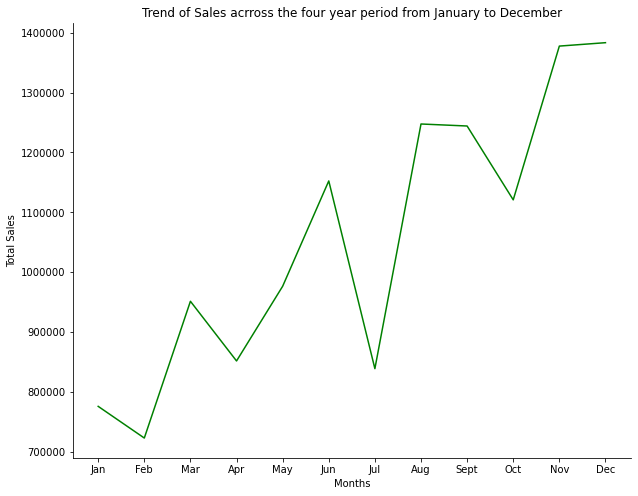

In [ ]:
# Ploting a line graph for months and total sales
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x = 'Month', y = 'Total_sales', data=month_sales, ax=ax, color='green')
ax.set(xlabel = 'Months',ylabel = 'Total Sales' ,title = 'Trend of Sales acrross the four year period from January to December')
plt.ticklabel_format(style='plain',axis='y')
sns.despine()

In [ ]:
more_sales = month_sales[month_sales['Total_sales'] ==month_sales['Total_sales'].max() ]
more_sales

,Month,Total_sales
11,Dec,1383335.107


## What is the correlation between discount and sale?

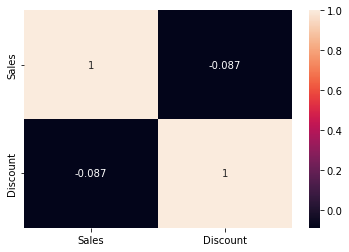

In [ ]:
sales_discount = data[['Sales','Discount']]
cormat = sales_discount.corr()
sns.heatmap(cormat,annot=True)
plt.show()

In [ ]:
cormat

,Sales,Discount
Sales,1.000000,-0.086722
Discount,-0.086722,1.000000


In [ ]:
# Discount and sales have a negative linear correlation with very weak strenth

## Does the shipping cost affect the sales?

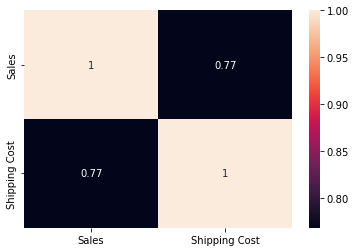

In [ ]:
sales_shiping_cost = data[['Sales','Shipping Cost']]
cormat1 = sales_shiping_cost.corr()
sns.heatmap(cormat1,annot=True)
plt.show()

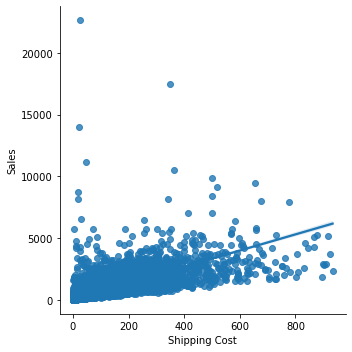

In [ ]:
# The daily earnings vs price:
sns.lmplot(
    x='Shipping Cost', 
    y='Sales', 
    data=sales_shiping_cost
)

## What is the dominant product category in each market?

In [ ]:
data_domi_prod = data.groupby(['Market','Category']).agg(Total_Sales = ('Sales','sum'))
data_domi_prod

Total_Sales
Market Category                     
APAC   Furniture        1.343934e+06
       Office Supplies  8.843198e+05
       Technology       1.357490e+06
Africa Furniture        1.946506e+05
       Office Supplies  2.667555e+05
       Technology       3.223670e+05
Canada Furniture        1.059528e+04
       Office Supplies  3.003408e+04
       Technology       2.629881e+04
EMEA   Furniture        2.286207e+05
       Office Supplies  2.766860e+05
       Technology       3.008546e+05
EU     Furniture        7.791030e+05
       Office Supplies  1.046307e+06
       Technology       1.112679e+06
LATAM  Furniture        8.119706e+05
       Office Supplies  5.639207e+05
       Technology       7.887138e+05
US     Furniture        7.419998e+05
       Office Supplies  7.190470e+05
       Technology       8.361540e+05

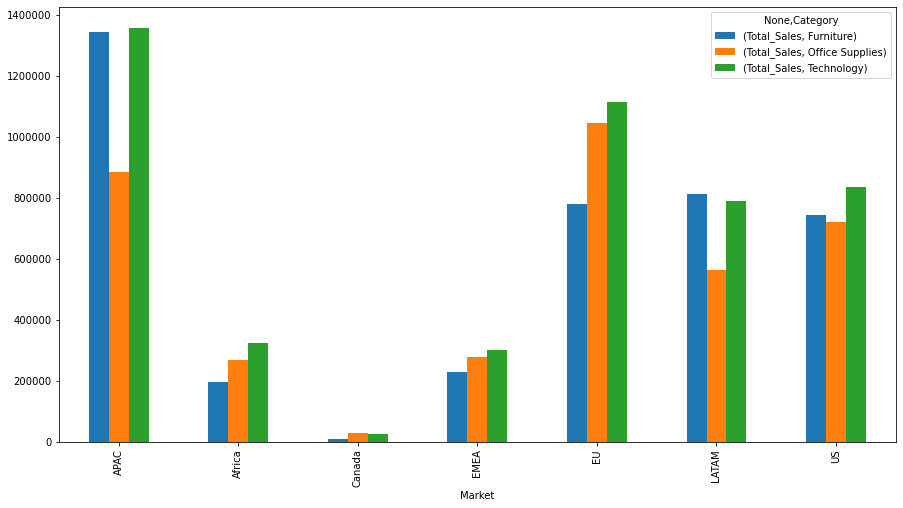

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
data_domi_prod.unstack().plot.bar(ax=ax)
plt.ticklabel_format(style='plain',axis='y')

In [ ]:
# For APAC, Africa, EU, US,EMEA Techology is the dominant product category 
# LATAM has Furniture to be its dorminant product category
# Canada has Office supplies to be its dorminant product category

## City with most orders for a given product category?

In [ ]:
city_product = data.groupby(['City','Category']).agg(Total_Orders = ('Order ID','count')).reset_index()
city_product

,City,Category,Total_Orders
0,Aachen,Furniture,2
1,Aachen,Office Supplies,14
2,Aachen,Technology,1
3,Aalen,Furniture,1
4,Aalen,Office Supplies,0
...,...,...,...
10903,eMbalenhle,Office Supplies,2
10904,eMbalenhle,Technology,0
10905,Águas Lindas de Goiás,Furniture,0
10906,Águas Lindas de Goiás,Office Supplies,4


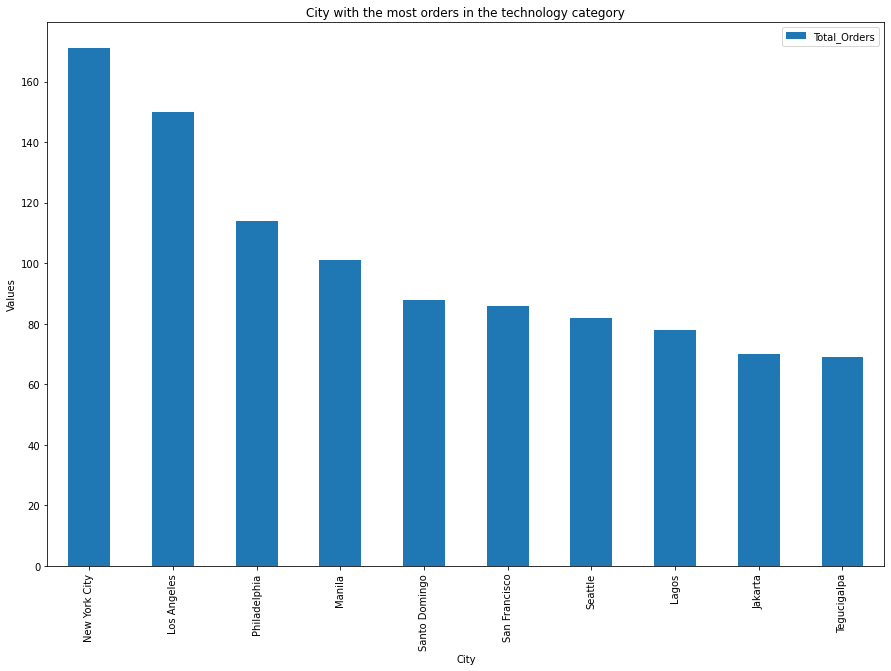

In [ ]:
tech = city_product[(city_product['Category'] == 'Technology')].sort_values('Total_Orders',ascending=False)
#tech = tech[tech['Total_Orders']== tech['Total_Orders'].max()]
tech = tech.head(10)
tech.plot(x= 'City',y = 'Total_Orders',kind= 'bar',figsize = (15,10),title = 'City with the most orders in the technology category')
plt.ylabel('Values')
plt.show()

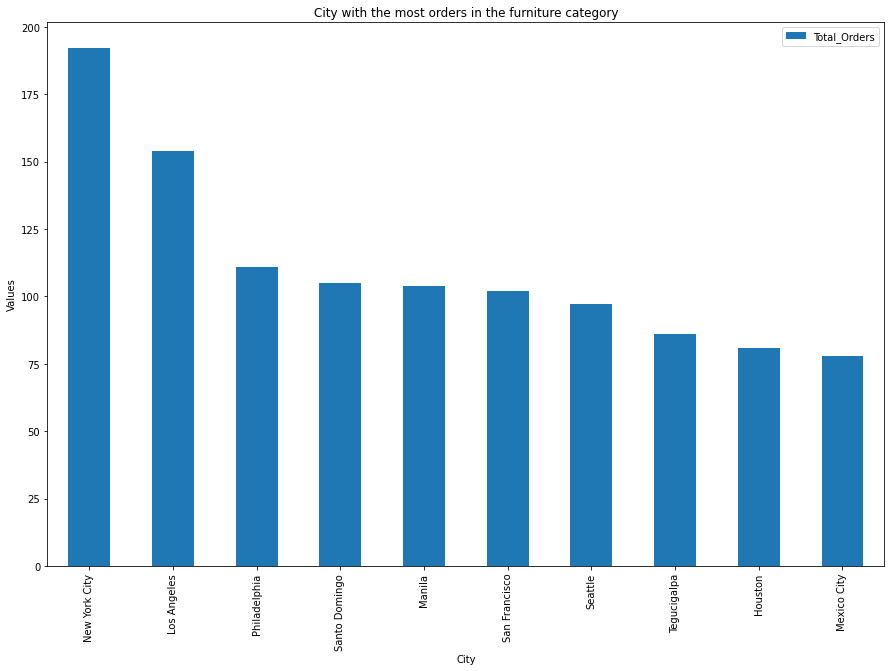

In [ ]:
furn = city_product[(city_product['Category'] == 'Furniture')].sort_values('Total_Orders',ascending=False)
#furn = furn[furn['Total_Orders']== furn['Total_Orders'].max()]
furn = furn.head(10)
furn.plot(x= 'City',y = 'Total_Orders',kind= 'bar',figsize = (15,10),title = 'City with the most orders in the furniture category')
plt.ylabel('Values')
plt.show()

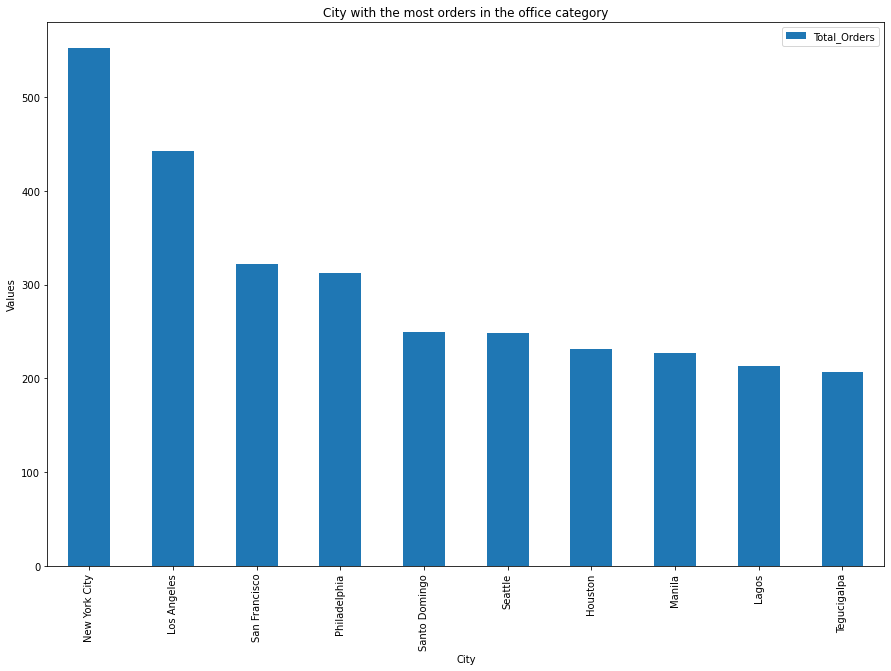

In [ ]:
office = city_product[(city_product['Category'] == 'Office Supplies')].sort_values('Total_Orders',ascending=False)
#office = office[office['Total_Orders']== office['Total_Orders'].max()]
office = office.head(10)
office.plot(x= 'City',y = 'Total_Orders',kind= 'bar',figsize = (15,10),title = 'City with the most orders in the office category')
plt.ylabel('Values')
plt.show()

## which products are making loss?

In [ ]:
prod_profit = data.groupby('Product Name').agg(Total_profit= ('Profit','sum')).reset_index()
prod_profit = prod_profit.sort_values('Total_profit')
# Top ten products that are making losses
prod_profit.head(10)

,Product Name,Total_profit
1007,Cubify CubeX 3D Printer Double Head Print,-8879.9704
2233,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
2414,"Motorola Smart Phone, Cordless",-4447.0380
1008,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
614,"Bevis Round Table, Adjustable Height",-3649.8940
603,"Bevis Computer Table, Fully Assembled",-3509.5638
2847,"Rogers Lockers, Blue",-2893.4908
910,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
627,"Bevis Wood Table, with Bottom Storage",-2782.5880
2221,"Lesro Training Table, Rectangular",-2581.2834


## Which segment provides more profit?

In [ ]:
seg_profit = data.groupby('Segment').agg(Total_Profit = ('Profit','sum')).reset_index()
seg_profit = seg_profit.sort_values('Total_Profit',ascending= False)
seg_profit

,Segment,Total_Profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


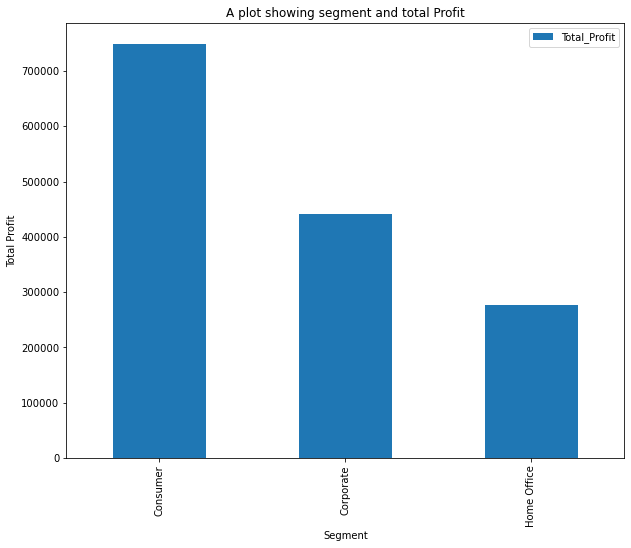

In [ ]:
seg_profit.plot(x="Segment", y=["Total_Profit"], kind="bar", figsize=(10, 8))
plt.ylabel('Total Profit')
plt.title('A plot showing segment and total Profit')
plt.show()

In [ ]:
seg_profit[seg_profit['Total_Profit'] == seg_profit['Total_Profit'].max() ]

,Segment,Total_Profit
0,Consumer,749239.78206


## what is the correlation between quantity and profit?

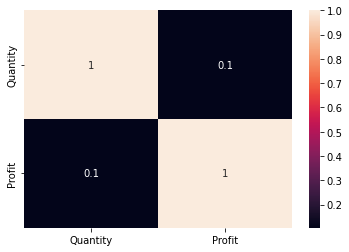

In [ ]:
quantity_profit = data[['Quantity','Profit']]
cormat3 = quantity_profit.corr()
sns.heatmap(cormat3,annot=True)
plt.show()

In [ ]:
cormat3

,Quantity,Profit
Quantity,1.000000,0.104365
Profit,0.104365,1.000000


In [ ]:
# Quantity and profit has a positive linear correlation with weak strenth

## What is the correlation between shipping cost and profit?

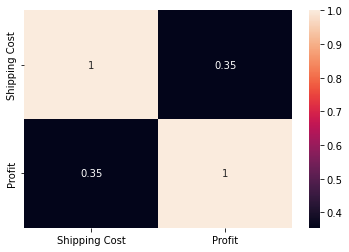

In [ ]:
shiping_profit = data[['Shipping Cost','Profit']]
cormat3 = shiping_profit.corr()
sns.heatmap(cormat3,annot=True)
plt.show()

In [ ]:
cormat3

,Shipping Cost,Profit
Shipping Cost,1.000000,0.354441
Profit,0.354441,1.000000


In [ ]:
# Shiping cost and profit has a positive linear correlation with moderate strenth

## Which order priority yields more sales?

In [ ]:
priority_sales = data.groupby('Order Priority').agg(Total_sales = ('Sales','sum')).reset_index()
priority_sales = priority_sales.sort_values('Total_sales',ascending = False)
priority_sales

,Order Priority,Total_sales
3,Medium,7.280892e+06
1,High,3.807548e+06
0,Critical,9.862355e+05
2,Low,5.678259e+05


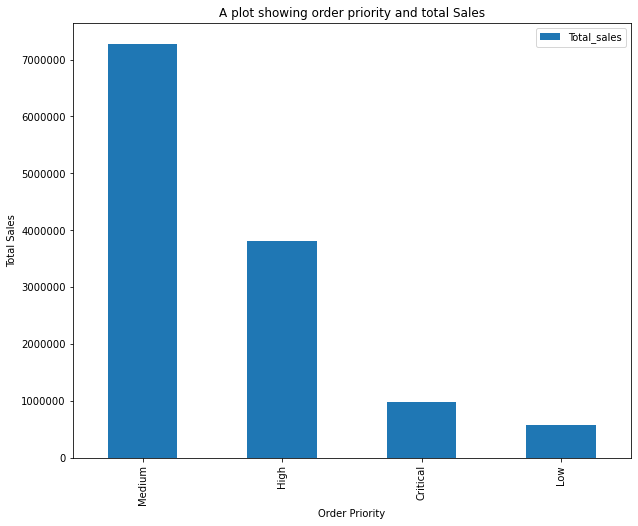

In [ ]:
priority_sales.plot(x="Order Priority", y=["Total_sales"], kind="bar", figsize=(10, 8))
plt.ylabel('Total Sales')
plt.title('A plot showing order priority and total Sales')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [ ]:
priority_sales[priority_sales['Total_sales'] == priority_sales['Total_sales'].max() ]

,Order Priority,Total_sales
3,Medium,7.280892e+06


## What is the average shipping cost to each region?

In [ ]:
ave_ship_region = data.groupby('Region').agg(Average_Shipping_Cost = ('Shipping Cost','mean')).reset_index()
ave_ship_region = ave_ship_region.sort_values('Average_Shipping_Cost',ascending=False)
ave_ship_region

,Region,Average_Shipping_Cost
8,North Asia,40.646112
4,Central Asia,38.003003
9,Oceania,34.593780
11,Southeast Asia,29.937948
7,North,27.476299
3,Central,26.710494
6,East,25.542001
10,South,25.353509
12,West,23.887687
2,Caribbean,21.059260


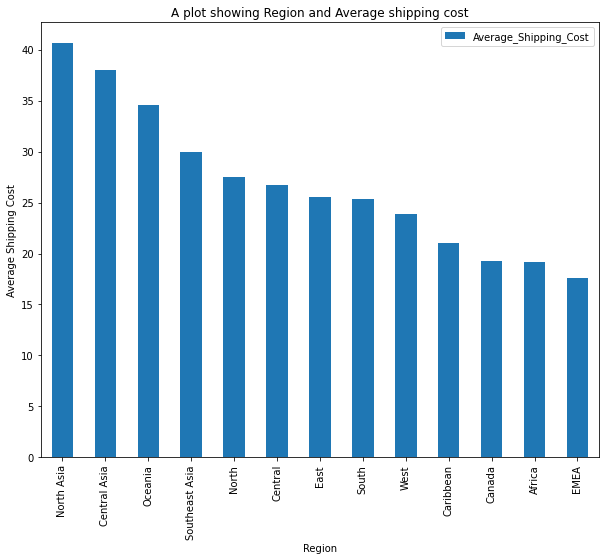

In [ ]:
ave_ship_region.plot(x="Region", y=["Average_Shipping_Cost"], kind="bar", figsize=(10, 8))
plt.ylabel('Average Shipping Cost')
plt.title('A plot showing Region and Average shipping cost')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

## What product categories should be targetted to the different markets?



In [ ]:
# For APAC, Africa, EU, US,EMEA Techology should be targeted
# For LATAM we should target the furniture category
# For Canada we should target the office supply

## Does the interval between the order date and the shipping date affect sale and profit

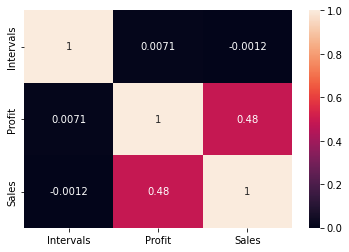

In [ ]:
effect = data[['Intervals','Profit','Sales']]
cormat_effect = effect.corr()
sns.heatmap(cormat_effect,annot=True)
plt.show()